<a href="https://colab.research.google.com/github/abezepeda/csc645-02/blob/master/suoper%20bakcup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Proj1A - Basic Regression: Understanding the ADNI Data Using Regression

> Indented block








<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Instructions

Please make a copy and rename it with your name (ex: Proj1A_Ilmi_Yoon). All grading points should be explored in the notebook but some can be done in a separate pdf file. 

*Graded questions will be listed with "Q:" followed by the corresponding points.* 

You will be submitting **a pdf** file containing **the url of your own proj1A.**


---



>[Proj1A - Basic Regression: Understanding the ADNI Data Using Regression](#scrollTo=EIdT9iu_Z4Rb)

>>[1. Load in the Data](#scrollTo=gFh9ne3FZ-On)

>>[2. Clean the Data](#scrollTo=3MWuJTKEDM-f)

>>[3Inspect the Data](#scrollTo=J4ubs136WLNp)

>>[Select a Few Features to Work On and Split Features from Labels](#scrollTo=Db7Auq1yXUvh)

>>[Normalization](#scrollTo=mRklxK5s388r)

>>>[5.1 The Normalization Layer](#scrollTo=aFJ6ISropeoo)

>>[Linear regression](#scrollTo=6o3CrycBXA2s)

>>>[6.1. One Variable](#scrollTo=lFby9n0tnHkw)

>>>[6.2. Multiple Variables (Features)](#scrollTo=Yk2RmlqPoM9u)

>[Extra Credit: A DNN regression](#scrollTo=SmjdzxKzEu1-)

>>[Instructions](#scrollTo=DT_aHPsrzO1t)

>>[A. Train the Model](#scrollTo=ELz48lsgqC46)

>>>[A1. One Variable](#scrollTo=7T4RP1V36gVn)

>>>[A2. Full Model](#scrollTo=S_2Btebp2e64)

>>[B. Performance](#scrollTo=uiCucdPLfMkZ)

>>[C. Make Predictions](#scrollTo=ft603OzXuEZC)

>[Conclusion](#scrollTo=vgGQuV-yqYZH)



## Table of Contents

Introduction (Points: 30 points)
1. Load in the Data
2. Clean the Data
3. Inspect the Data
4. Select a Few Features to Work On and Split Features from Labels
5. Normalization

  5.1 The Normalization Layer

6. Linear Regression

  6.1 One Variable
 
  6.2 Multiple Variable (Features)

A DNN Regression (Extra Credit: 3 points)

1. Instructions
2. A. Train the Model 

  A1. One Variable 
  
  A2. Full Model

3. B. Performance
4. C. Make Predictions

Conclusion

---



## Introduction

In a **regression** problem, the aim is to *predict the output of a continuous value*, like a price or a probability.

Contrast this with a **classification** problem, where the aim is to *select a class from a list of classes* (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This example uses the `tf.keras API`, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [ ]:
# Use seaborn for pairplot
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


### 1. Load in the Data
First download and import the dataset using pandas:

In [ ]:
url = "https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/PatData.csv" 
data = pd.read_csv(url)

In [ ]:
dataset = data.copy()
dataset.tail()

,PTID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,DX,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
1732,941_S_4377,69.3,Female,12,Not Hisp/Latino,White,Widowed,1.0,MCI,19850.0,6276.500000,854605.0,3098.750000,14773.000000,16232.75,1.307478e+06
1733,941_S_4420,81.4,Male,18,Not Hisp/Latino,White,Married,0.0,MCI,45450.5,7542.250000,1125837.5,4501.750000,16491.250000,17802.75,1.658722e+06
1734,941_S_4764,82.7,Female,20,Not Hisp/Latino,White,Never married,0.0,MCI,63228.5,6092.500000,915772.5,3933.666667,17667.333333,17832.00,1.483815e+06
1735,941_S_5124,76.7,Female,20,Not Hisp/Latino,White,Married,0.0,NL,NaN,4691.666667,NaN,NaN,NaN,NaN,1.489683e+06
1736,941_S_5193,72.5,Female,16,Not Hisp/Latino,White,Married,0.0,NL,22958.5,7009.500000,1026105.0,4007.500000,15812.500000,17461.00,1.465065e+06


In [ ]:
dataset['DX'].value_counts()

MCI                586
Dementia           577
NL                 423
MCI to Dementia    108
NL to MCI           29
MCI to NL            3
NL to Dementia       3
Dementia to MCI      1
Name: DX, dtype: int64

So, I would like to take out everything in the dataset **EXCEPT** the following levels: NL, MCI and Dementia. 

*NL = cognitively normal , MCI = mild cognitive impairement.*

In [ ]:
index_to_drop = dataset[ (dataset['DX'] != "MCI") & (dataset['DX'] != "NL") & (dataset['DX'] != "Dementia")].index
  
# drop these given row indices from data
dataset = dataset.drop(index_to_drop)

In [ ]:
dataset['DX'].value_counts()

MCI         586
Dementia    577
NL          423
Name: DX, dtype: int64

### 2. Clean the Data

The dataset contains a few unknown values. To see how many unknown values, use the following code:

In [ ]:
dataset.isna().sum()

PTID            0
AGE             0
PTGENDER        0
PTEDUCAT        0
PTETHCAT        0
PTRACCAT        0
PTMARRY         0
APOE4           6
DX              0
Ventricles     20
Hippocampus    50
WholeBrain     12
Entorhinal     92
Fusiform       92
MidTemp        92
ICV             1
dtype: int64

Drop those rows to keep this initial tutorial simple.

Q: **(1 point)** What are other ways to process these rows instead of dropping? 

In [ ]:
dataset = dataset.dropna()

In [ ]:
# dataset['APOE4'] = dataset['APOE4'].fillna(dataset['APOE4'].mean ())
# dataset['Ventricles'] = dataset['Ventricles'].fillna(dataset['Ventricles'].mean())
# dataset['Hippocampus'] = dataset['Hippocampus'].fillna(dataset['Hippocampus'].mean())
# dataset['WholeBrain'] = dataset['WholeBrain'].fillna(dataset['WholeBrain'].mean())
# dataset['Entorhinal'] = dataset['Entorhinal'].fillna(dataset['Entorhinal'].mean())
# dataset['Fusiform'] = dataset['Fusiform'].fillna(dataset['Fusiform'].mean())
# dataset['MidTemp'] = dataset['MidTemp'].fillna(dataset['MidTemp'].median())
# dataset['ICV'] = dataset['ICV'].fillna(dataset['ICV'].mean())
# (dataset==np.nan).sum()

Categorical Data needs to be properly handled using one-hot-encoding. 

Q: **(2 points)** Explain in 200 words what is one-hot-encoding and why it is necessary to handle categorical data.

Q: **(1 point)** Make one more categorical feature into one-hot-encoding 

Q: **(1 point)** Explain why DX column is mapped to numeric values as below.

In [ ]:
cleanup_DX = {"DX": {"NL": 1, "MCI": 2, "Dementia": 3}}
dataset = dataset.replace(cleanup_DX)

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### 3. Inspect the Data

Have a quick look at the joint distribution of a few pairs of columns from the training set. *Can you find the data that show their relationship clearly?*

Q: **(2 points)** Please work with different columns and write what you have learned from the visualization of the data.  

In [ ]:
# sns.pairplot(train_dataset[["AGE", "Hippocampus", "Ventricles", "WholeBrain", "Entorhinal", "Fusiform", "MidTemp", "ICV", "APOE4", "DX"]], diag_kind="kde")

Also look at the overall statistics, note how each feature covers a very different range:

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,1183.0,7.354328e+01,7.186444,54.400000,6.910000e+01,7.360000e+01,7.850000e+01,9.140000e+01
PTEDUCAT,1183.0,1.592899e+01,2.878245,4.000000,1.400000e+01,1.600000e+01,1.800000e+01,2.000000e+01
APOE4,1183.0,5.714286e-01,0.666908,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
DX,1183.0,2.091293e+00,0.790243,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
Ventricles,1183.0,4.228182e+04,23852.178487,6069.500000,2.461721e+04,3.727520e+04,5.366138e+04,1.514055e+05
Hippocampus,1183.0,6.631566e+03,1237.390482,2894.500000,5.735750e+03,6.717167e+03,7.537117e+03,1.094188e+04
WholeBrain,1183.0,1.013104e+06,111468.502835,712985.400000,9.358254e+05,1.008554e+06,1.089934e+06,1.425556e+06
Entorhinal,1183.0,3.398071e+03,785.824008,1143.000000,2.874750e+03,3.443000e+03,3.945167e+03,5.931000e+03
Fusiform,1183.0,1.706231e+04,2772.266839,8863.666667,1.520095e+04,1.708750e+04,1.887675e+04,2.863750e+04
MidTemp,1183.0,1.904685e+04,3155.796565,8850.333333,1.705983e+04,1.905550e+04,2.118038e+04,2.902000e+04


The code below allows you to look into different groups of data -- normal patients, mild patients and dimential patients. 

Q: **(3 points)** Play with the total data and/or each group data and its regression on age, DX, and other columns 

In [ ]:
# NL_index_to_drop = train_dataset[ (train_dataset['DX'] != 1) ].index

# # drop these given row indices from data
# train_dataset = train_dataset.drop(NL_index_to_drop)
# train_dataset.describe().transpose()

In [ ]:
# MCI_index_to_drop = train_dataset[ (train_dataset['DX'] != 2) ].index

# # drop these given row indices from data
# train_dataset = train_dataset.drop(MCI_index_to_drop)
# train_dataset.describe().transpose()

In [ ]:
# Dementia_index_to_drop = train_dataset[ (train_dataset['DX'] != 3) ].index

# # drop these given row indices from data
# train_dataset = train_dataset.drop(Dementia_index_to_drop)
# train_dataset.describe().transpose()

### 4. Select a Few Features to Work On and Split Features from Labels

Separate the target value (the "label") from the features. **This label is the value that you will train the model to predict.**

In [ ]:
train_features = train_dataset[["Ventricles","Hippocampus"]]
test_features = test_dataset[["Ventricles","Hippocampus"]]


train_labels = train_dataset["DX"]
test_labels = test_dataset["DX"]

## 5. Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.

Q: **(2 points)** Write in 100 words why normalization is important.

*Note*: There is no advantage to normalizing the one-hot features, it is done here for simplicity. For more details on how to use the preprocessing layers, refer the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers) tutorial.

In [ ]:
train_features.describe().transpose()[['mean', 'std']]

,mean,std
Ventricles,42281.820746,23852.178487
Hippocampus,6631.566231,1237.390482


### 5.1 The Normalization Layer
The `preprocessing.Normalization` layer is a clean and simple way to build that preprocessing into your model.

The first step is to create the layer:

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)

Then `.adapt()` it to the data:

In [ ]:
normalizer.adapt(np.array(train_features))

The following code calculates the mean and variance, and stores them in the layer. 

In [ ]:
print(normalizer.mean.numpy())

[[42281.82   6631.566]]


When the layer is called, it returns the input data with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[14853.25  5796.2 ]]

Normalized: [[-1.15 -0.68]]


## 6. Linear regression

Before building a DNN model, start with a linear regression.

### 6.1. One Variable

Start with a single-variable linear regression, to predict `AGE` from `hippocampus`.

Q: **(5 points)** Please pick different variable or lable to explore the relationship of the features. 

Try and show at least 3 different variations.
Training a model with `tf.keras` typically starts by defining the model architecture.

In this case use a `keras.Sequential` model. This model represents a sequence of steps. In this case there are two steps:

* Normalize the input `hippocampus`.
* Apply a linear transformation ($y = mx+b$) to produce 1 output using `layers.Dense`.

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First create the hippocampus `Normalization` layer:

In [ ]:
input_feature = 'Hippocampus'
feature = np.array(train_dataset[input_feature])


feature_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
feature_normalizer.adapt(feature)

Build the sequential model:

In [ ]:
feature_model = tf.keras.Sequential([
    feature_normalizer,
    layers.Dense(units=1)
])

feature_model.summary()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_52 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict `AGE` from `hippocampus`.

Run the untrained model on the first 10 horse-power values. The output won't be good, but you'll see that it has the expected shape, `(10,1)`:

In [ ]:
feature_model.predict(feature[:10])

array([[ 0.217],
       [-0.454],
       [ 0.349],
       [ 0.237],
       [-0.125],
       [ 0.643],
       [ 0.433],
       [ 0.325],
       [-0.048],
       [-0.243]], dtype=float32)

Once the model is built, configure the training procedure using the `Model.compile()` method. The most important arguments to compile are the `loss` and the `optimizer` since these define what will be optimized (`mean_absolute_error`) and how (using the `optimizers.Adam`).

In [ ]:
feature_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the training is configured, use `Model.fit()` to execute the training:

Q: **(5 points)** Explore different hyperparameters such as learning rate, epochs, batch sizes. Please document your explorations and reflections.

In [ ]:
%%time
history = feature_model.fit(
    train_dataset[input_feature], train_labels,
    epochs=100,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
30/30 [==============================] - 1s 7ms/step - loss: 1.0373 - val_loss: 0.5992
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5613 - val_loss: 0.5557
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5411 - val_loss: 0.5558
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5449 - val_loss: 0.5609
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5464 - val_loss: 0.5568
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5437 - val_loss: 0.5564
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5452 - val_loss: 0.5555
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5449 - val_loss: 0.5572
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5446 - val_loss: 0.5567
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5425 - val_loss: 0.5611
Epoch 11/

Visualize the model's training progress using the stats stored in the `history` object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.544381,0.560862,95
96,0.542111,0.557436,96
97,0.541170,0.564071,97
98,0.549533,0.556339,98
99,0.546696,0.560644,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

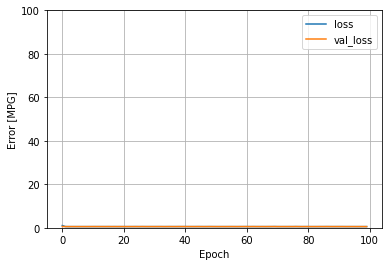

In [ ]:
plot_loss(history)

Collect the results on the test set, for later:

In [ ]:
test_results = {}

test_results['feature_model'] = feature_model.evaluate(
    test_dataset[input_feature],
    test_labels, verbose=0)

Since this is a single variable regression it's easy to look at the model's predictions as a function of the input:

Q: **(1 point)** Replace the hard-coded constants with the min & max of this variable to work with other variables without changing it.

In [ ]:
x = tf.linspace(min(train_dataset[input_feature]),max(train_dataset[input_feature]), 100)
y = feature_model.predict(x)

Q: **(1 point)** The name of feature 'Hippocampus' and the label 'age' should be replaced as variables, so exploring different variables will be easy without making changes every time. 

In [ ]:
def plot_feature(x, y):
  plt.scatter(train_dataset[input_feature], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(input_feature)
  plt.ylabel('DX')
  plt.legend()

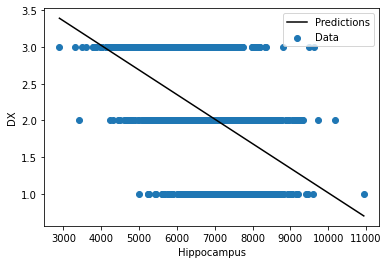

In [ ]:
plot_feature(x,y)

### 6.2. Multiple Variables (Features)

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same $y = mx+b$ except that $m$ is a matrix and $b$ is a vector.

This time use the `Normalization` layer that was adapted to the whole dataset.

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_51 (Normalizat (None, 2)                 5         
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 3         
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


When you call this model on a batch of inputs, it produces `units=1` outputs for each example.

In [ ]:
linear_model.predict(train_features[:10])

array([[-1.593],
       [ 0.691],
       [-0.342],
       [-1.19 ],
       [-1.257],
       [ 2.143],
       [ 0.636],
       [-1.846],
       [ 0.876],
       [ 0.425]], dtype=float32)

When you call the model it's weight matrices will be built. Now you can see that the `kernel` (the $m$ in $y=mx+b$) has a shape of `(9,1)`.

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_174/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[1.285],
       [0.171]], dtype=float32)>

Use the same `compile` and `fit` calls as for the single input `hippocampus` model:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=80,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 9.16 s, sys: 1.04 s, total: 10.2 s
Wall time: 10.6 s


Using all the inputs achieves a much lower training and validation error than the `hippocampus` model: 

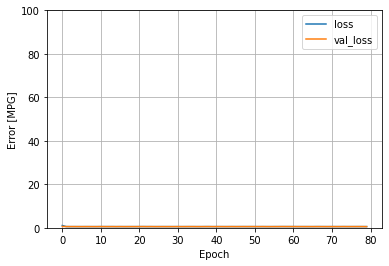

In [ ]:
plot_loss(history)

Collect the results on the test set, for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

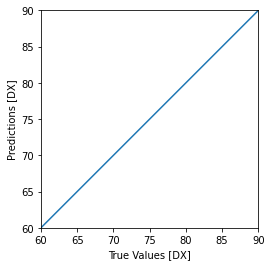

In [ ]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [DX]')
plt.ylabel('Predictions [DX]')
lims = [60, 90]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


Q: **(6 points)** Explore different features as train_features and label and see what relationship help you understand the ADNI data set better. Show that you explored at least 3 different combinations of features and label and write your reflection in 200 words or more

# Extra Credit: A DNN regression

## Instructions

 DNN regression is for extra credit. You don't have to do the below parts. 
 
 Q: **(Extra Credit = 3 points)** If you like to explore, then please go ahead and compare with the linear regression and write a reflection in 200 words.

The previous section implemented linear models for single and multiple inputs.

This section implements single-input and multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The word "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer;
* Two hidden, nonlinear, `Dense` layers using the `relu` nonlinearity; and
* A linear single-output layer.

Both will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

## A. Train the Model

### A1. One Variable

Start with a DNN model for a single input, "hippocampus":

In [ ]:
dnn_hippocampus_model = build_and_compile_model(hippocampus_normalizer)

This model has quite a few more trainable parameters than the linear models.

In [ ]:
dnn_hippocampus_model.summary()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_15 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_175 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_176 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_177 (Dense)            (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model:

In [ ]:
%%time
history = dnn_hippocampus_model.fit(
    train_features['Hippocampus'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 12.2 s, sys: 1.37 s, total: 13.6 s
Wall time: 10.1 s


This model does slightly better than the linear-hippocampus model.

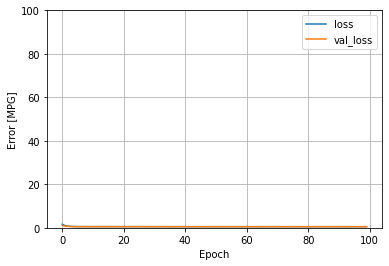

In [ ]:
plot_loss(history)

If you plot the predictions as a function of `hippocampus`, you'll see how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(3000.0, 11000, 100)
y = dnn_hippocampus_model.predict(x)

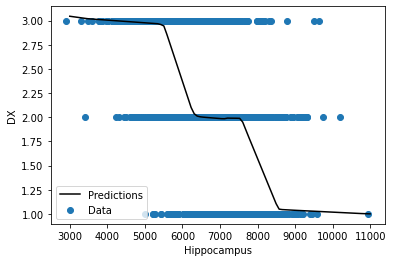

In [ ]:
plot_hippocampus(x, y)

Collect the results on the test set, for later:

In [ ]:
test_results['dnn_hippocampus_model'] = dnn_hippocampus_model.evaluate(
    test_features['Hippocampus'], test_labels,
    verbose=0)

### A2. Full Model

If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_51 (Normalizat (None, 2)                 5         
_________________________________________________________________
dense_178 (Dense)            (None, 64)                192       
_________________________________________________________________
dense_179 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_180 (Dense)            (None, 1)                 65        
Total params: 4,422
Trainable params: 4,417
Non-trainable params: 5
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 12.2 s, sys: 1.38 s, total: 13.6 s
Wall time: 10.7 s


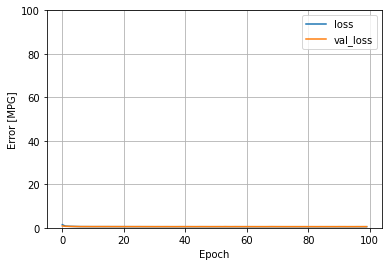

In [ ]:
plot_loss(history)

Collect the results on the test set:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## B. Performance

Now that all the models are trained check the test-set performance and see how they did:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [AGE]']).T

,Mean absolute error [AGE]
feature_model,0.533587
linear_model,0.540464
dnn_hippocampus_model,0.500016
dnn_model,0.523128


These results match the validation error seen during training.

## C. Make Predictions

Finally, predict have a look at the errors made by the model when making predictions on the test set:

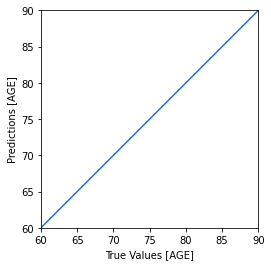

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [AGE]')
plt.ylabel('Predictions [AGE]')
lims = [60, 90]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


It looks like the model predicts reasonably well. 

Now take a look at the error distribution:

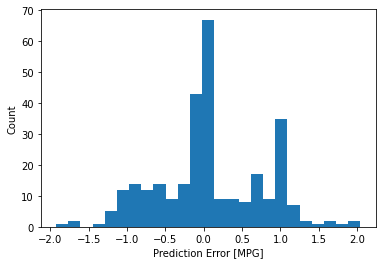

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

If you're happy with the model save it for later use:

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


If you reload the model, it gives identical output:

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
feature_model,0.533587
linear_model,0.540464
dnn_hippocampus_model,0.500016
dnn_model,0.523128
reloaded,0.523128


# Conclusion

This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

* [Mean Squared Error (MSE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanSquaredError) and [Mean Absolute Error (MAE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanAbsoluteError) are common loss functions used for regression problems. Mean Absolute Error is less sensitive to outliers. Different loss functions are used for classification problems.
* Similarly, evaluation metrics used for regression differ from classification.
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* Overfitting is a common problem for DNN models, it wasn't a problem for this tutorial. See the [overfit and underfit](overfit_and_underfit.ipynb) tutorial for more help with this.
